## Excercise done by saharsh 

In [2]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data - scale pixel values for modeling
x_train = x_train / 255.0
x_test = x_test / 255.0

# One-hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a Sequential model
model = Sequential([
  Flatten(input_shape=(28, 28)),  # Flatten the input data
  Dense(128, activation='relu'),  # First dense layer with 128 neurons
  Dense(10, activation='softmax') # Output layer with 10 neurons (one for each digit) with softmax activation
])

# Compile the model
model.compile(
  optimizer='adam',  # Adam optimizer; you can also try others like 'sgd' for Stochastic Gradient Descent
  loss='categorical_crossentropy',  # This loss function is common for multi-class classification
  metrics=['accuracy']
)

# Train the model
model.fit(
  x_train, 
  y_train, 
  epochs=10,  # Number of epochs (full passes through the training dataset) to train for
  batch_size=32,  # Number of samples per gradient update
  validation_data=(x_test, y_test)  # Data to use for evaluating loss and model performance
)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

# Make a prediction
# The predict function returns a probability distribution, so we'll use argmax to get the label with the highest probability
import numpy as np
predictions = model.predict(x_test[:1])  # predict the first instance in the test set
predicted_label = np.argmax(predictions, axis=1)[0]
print(f"Predicted Label: {predicted_label}")
print(f"True Label: {np.argmax(y_test[0])}")


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2586 - accuracy: 0.9267 - val_loss: 0.1415 - val_accuracy: 0.9585
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1138 - accuracy: 0.9662 - val_loss: 0.0996 - val_accuracy: 0.9704
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0783 - accuracy: 0.9770 - val_loss: 0.0846 - val_accuracy: 0.9732
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0590 - accuracy: 0.9822 - val_loss: 0.0788 - val_accuracy: 0.9774
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0458 - accuracy: 0.9856 - val_loss: 0.0740 - val_accuracy: 0.9783
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0350 - accuracy: 0.9894 - val_loss: 0.0685 - val_accuracy: 0.9800
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0277 - accuracy: 0.9912 - val_loss: 0.0742 - val_accuracy:

## IMAGE PROCESSING MODEL (K.SAHARSH)

In [4]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data for the convolutional network and normalize
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a Sequential model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Data augmentation
data_augmentation = tf.keras.Sequential([
  tf.keras.layers.experimental.preprocessing.RandomRotation(factor=0.1),
  tf.keras.layers.experimental.preprocessing.RandomZoom(height_factor=0.1),
])

# Train the model with data augmentation
batch_size = 128
epochs = 15

history = model.fit(
    data_augmentation.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) / batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


AttributeError: 'Sequential' object has no attribute 'flow'

Epoch 1/15
468/468 [==============================] - 54s 115ms/step - loss: 0.4692 - accuracy: 0.8529 - val_loss: 0.0507 - val_accuracy: 0.9830
Epoch 2/15
468/468 [==============================] - 54s 116ms/step - loss: 0.1933 - accuracy: 0.9414 - val_loss: 0.0380 - val_accuracy: 0.9876
Epoch 3/15
468/468 [==============================] - 55s 117ms/step - loss: 0.1531 - accuracy: 0.9542 - val_loss: 0.0339 - val_accuracy: 0.9889
Epoch 4/15
468/468 [==============================] - 56s 120ms/step - loss: 0.1363 - accuracy: 0.9594 - val_loss: 0.0294 - val_accuracy: 0.9900
Epoch 5/15
468/468 [==============================] - 58s 123ms/step - loss: 0.1171 - accuracy: 0.9655 - val_loss: 0.0273 - val_accuracy: 0.9908
Epoch 6/15
468/468 [==============================] - 57s 122ms/step - loss: 0.1050 - accuracy: 0.9692 - val_loss: 0.0244 - val_accuracy: 0.9912
Epoch 7/15
468/468 [==============================] - 59s 125ms/step - loss: 0.0977 - accuracy: 0.9713 - val_loss: 0.0291 - val_ac

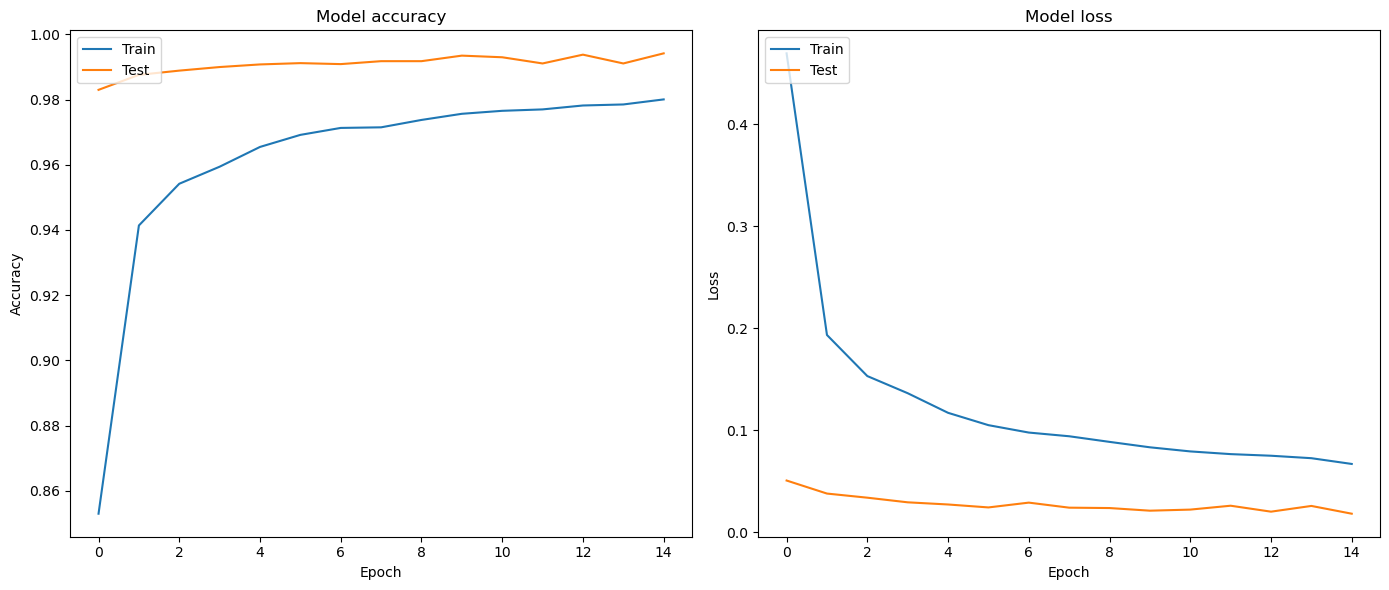

In [5]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Reshape data for the convolutional network and normalize
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32') / 255

# One-hot encode target values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create a Sequential model
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Data augmentation
data_generator = ImageDataGenerator(
    rotation_range=8,  # Randomly rotate images in the range
    zoom_range=0.1,  # Randomly zoom image 
    width_shift_range=0.1,  # Randomly shift images horizontally
    height_shift_range=0.1  # Randomly shift images vertically
)

# Train the model with data augmentation
batch_size = 128
epochs = 15

# Fits the model on batches with real-time data augmentation
history = model.fit(
    data_generator.flow(x_train, y_train, batch_size=batch_size),
    steps_per_epoch=len(x_train) / batch_size,
    epochs=epochs,
    verbose=1,
    validation_data=(x_test, y_test)
)

# Evaluate the model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

# Plot training & validation accuracy values
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


Coded by K.saharsh

In [7]:
pip install psutil

Note: you may need to restart the kernel to use updated packages.


In [8]:
pip install gputil

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for gputil: filename=GPUtil-1.4.0-py3-none-any.whl size=7394 sha256=f800b6830a84f027e59a2468ce1928be86f719413a2f10e2c50e6c00bcb9a948
  Stored in directory: c:\users\saharsh\appdata\local\pip\cache\wheels\2b\b5\24\fbb56595c286984f7315ee31821d6121e1b9828436021a88b3
Successfully built gputil
Note: you may need to restart the kernel to use updated packages.


In [9]:
import psutil
import GPUtil

# Get CPU information
cpu_frequency = psutil.cpu_freq()
cpu_count = psutil.cpu_count()
cpu_stats = psutil.cpu_stats()
cpu_percent = psutil.cpu_percent(interval=1)

print(f"CPU Frequency: {cpu_frequency.max:.2f}Mhz")
print(f"CPU Logical Cores: {cpu_count}")
print(f"CPU Statistics: {cpu_stats}")
print(f"CPU Utilization: {cpu_percent}%")

# Get GPU information
gpus = GPUtil.getGPUs()
for gpu in gpus:
    print(f"GPU {gpu.id} - {gpu.name}")
    print(f"  Load: {gpu.load*100}%")
    print(f"  Free Memory: {gpu.memoryFree}MB")
    print(f"  Used Memory: {gpu.memoryUsed}MB")
    print(f"  Total Memory: {gpu.memoryTotal}MB")
    print(f"  Temperature: {gpu.temperature} °C")
    print(f"  UUID: {gpu.uuid}")

CPU Frequency: 2688.00Mhz
CPU Logical Cores: 12
CPU Statistics: scpustats(ctx_switches=3749042364, interrupts=2137851916, soft_interrupts=0, syscalls=3244090030)
CPU Utilization: 1.2%
GPU 0 - NVIDIA GeForce RTX 3050 Laptop GPU
  Load: 0.0%
  Free Memory: 3403.0MB
  Used Memory: 573.0MB
  Total Memory: 4096.0MB
  Temperature: 54.0 °C
  UUID: GPU-66da65b9-2871-30d0-c5d7-54790caa982d


In [10]:
import psutil
import GPUtil

# Function to convert bytes to a more human-readable format
def get_size(bytes, suffix="B"):
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < 1024:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= 1024

# Get CPU information
cpu_frequency = psutil.cpu_freq()
cpu_count = psutil.cpu_count()
cpu_stats = psutil.cpu_stats()
cpu_percent = psutil.cpu_percent(interval=1)

print(f"CPU Frequency: {cpu_frequency.max:.2f}Mhz")
print(f"CPU Logical Cores: {cpu_count}")
print(f"CPU Statistics: {cpu_stats}")
print(f"CPU Utilization: {cpu_percent}%")

# Get RAM information
ram = psutil.virtual_memory()
print(f"Total RAM: {get_size(ram.total)}")
print(f"Available RAM: {get_size(ram.available)}")
print(f"Used RAM: {get_size(ram.used)}")
print(f"RAM Percentage used: {ram.percent}%")

# Get GPU information
gpus = GPUtil.getGPUs()
for gpu in gpus:
    print(f"GPU {gpu.id} - {gpu.name}")
    print(f"  Load: {gpu.load*100}%")
    print(f"  Free Memory: {gpu.memoryFree}MB")
    print(f"  Used Memory: {gpu.memoryUsed}MB")
    print(f"  Total Memory: {gpu.memoryTotal}MB")
    print(f"  Temperature: {gpu.temperature} °C")
    print(f"  UUID: {gpu.uuid}")


CPU Frequency: 2688.00Mhz
CPU Logical Cores: 12
CPU Statistics: scpustats(ctx_switches=3749980567, interrupts=2138419051, soft_interrupts=0, syscalls=3247096229)
CPU Utilization: 0.8%
Total RAM: 23.84GB
Available RAM: 14.78GB
Used RAM: 9.06GB
RAM Percentage used: 38.0%
GPU 0 - NVIDIA GeForce RTX 3050 Laptop GPU
  Load: 0.0%
  Free Memory: 3401.0MB
  Used Memory: 575.0MB
  Total Memory: 4096.0MB
  Temperature: 54.0 °C
  UUID: GPU-66da65b9-2871-30d0-c5d7-54790caa982d


In [11]:
import psutil
import GPUtil

# Function to convert bytes to a more human-readable format
def get_size(bytes, suffix="B"):
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < 1024:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= 1024

# Get CPU information
cpu_frequency_current = psutil.cpu_freq().current
cpu_frequency_max = psutil.cpu_freq().max
cpu_count = psutil.cpu_count()
cpu_stats = psutil.cpu_stats()
cpu_percent = psutil.cpu_percent(interval=1)

print(f"Current CPU Frequency: {cpu_frequency_current:.2f}Mhz")
print(f"Maximum CPU Frequency (Potential Turbo Boost): {cpu_frequency_max:.2f}Mhz")
print(f"CPU Logical Cores: {cpu_count}")
print(f"CPU Statistics: {cpu_stats}")
print(f"CPU Utilization: {cpu_percent}%")



Current CPU Frequency: 2688.00Mhz
Maximum CPU Frequency (Potential Turbo Boost): 2688.00Mhz
CPU Logical Cores: 12
CPU Statistics: scpustats(ctx_switches=3751151892, interrupts=2139128480, soft_interrupts=0, syscalls=3250633517)
CPU Utilization: 1.0%
